## 라이브러리

In [1]:
import requests
import json
import pandas as pd

import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [78]:
def residual_diag(residuals, lags = 20) :

    print('* 정규성 검정(> 0.05) : ', round(stats.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

## 데이터 전처리

In [126]:
data = pd.read_csv('data_final.csv')
data = data.loc[data['일자']>= '2017-10-31']
data = data.drop_duplicates('일자')

In [122]:

data.head()

,일자,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
61,2017-10-31,268,12,273.0,280.0,288.0,22.0,15.0,0.0
62,2017-11-01,286,18,268.0,335.0,320.0,12.0,0.0,63.0
63,2017-11-02,259,19,286.0,268.0,374.0,18.0,0.0,73.0
64,2017-11-03,267,0,259.0,282.0,367.0,19.0,0.0,53.0
65,2017-11-04,282,0,267.0,277.0,377.0,0.0,0.0,75.0


In [127]:
data['일자']= pd.to_datetime(data['일자'])
data['DT'] = data['일자']

data.set_index('DT', inplace=True)
data.drop('일자',axis=1,inplace=True)
data.head()


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30
DT,,,,,,,,
2017-10-31,268,12,273.0,280.0,288.0,22.0,15.0,0.0
2017-11-01,286,18,268.0,335.0,320.0,12.0,0.0,63.0
2017-11-02,259,19,286.0,268.0,374.0,18.0,0.0,73.0
2017-11-03,267,0,259.0,282.0,367.0,19.0,0.0,53.0
2017-11-04,282,0,267.0,277.0,377.0,0.0,0.0,75.0


In [117]:
data.shape

(1762, 8)

In [129]:
data = data.asfreq('D')



In [288]:
data['y'] = data['time'].shift(-7)
display(data.head())
display(data.tail())


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2017-10-31,268.0,12.0,273.0,280.0,288.0,22.0,15.0,0.0,242.0
2017-11-01,286.0,18.0,268.0,335.0,320.0,12.0,0.0,63.0,259.0
2017-11-02,259.0,19.0,286.0,268.0,374.0,18.0,0.0,73.0,273.0
2017-11-03,267.0,0.0,259.0,282.0,367.0,19.0,0.0,53.0,267.0
2017-11-04,282.0,0.0,267.0,277.0,377.0,0.0,0.0,75.0,285.0


,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2022-08-24,262.0,13.0,289.0,274.0,277.0,11.0,13.0,5.0,NaN
2022-08-25,278.0,10.0,262.0,267.0,272.0,13.0,11.0,6.0,NaN
2022-08-26,279.0,11.0,278.0,287.0,289.0,10.0,4.0,17.0,NaN
2022-08-27,302.0,11.0,279.0,289.0,299.0,11.0,11.0,23.0,NaN
2022-08-28,279.0,11.0,302.0,262.0,328.0,11.0,13.0,30.0,NaN


In [289]:
data.dropna(axis = 0, inplace = True)
data.tail()

,time,교통량,time_lag_day1,time_lag_day7,time_lag_day30,교통량_lag_day1,교통량_lag_day7,교통량_lag_day30,y
DT,,,,,,,,,
2022-08-17,291.0,13.0,264.0,328.0,300.0,13.0,30.0,16.0,262.0
2022-08-18,274.0,13.0,291.0,290.0,301.0,13.0,24.0,16.0,278.0
2022-08-19,271.0,18.0,274.0,267.0,270.0,13.0,24.0,16.0,279.0
2022-08-20,274.0,13.0,271.0,264.0,285.0,18.0,13.0,14.0,302.0
2022-08-21,267.0,11.0,274.0,291.0,259.0,13.0,13.0,18.0,279.0


In [290]:
target = 'y'

x = data.drop([target], axis = 1)
y = data.loc[:, target]

In [291]:
from sklearn.model_selection import TimeSeriesSplit

# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=30)

In [249]:
rmse, mae, mape, aic = [],[],[],[]
residuals = []
preds = []
p,d,q = 4,1,4

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    train = y[train_index]
    val = y[val_index]

    # 학습
    model = sm.tsa.SARIMAX(train, order=(p,d,q)).fit()

    # 예측
    pred = model.forecast(val_size)
    preds += list(pred)

    # 잔차 저장
    residuals += list(model.resid)

    # 평가
    rmse.append(mean_squared_error(val, pred, squared = False))
    mae.append(mean_absolute_error(val, pred))
    mape.append(mean_absolute_percentage_error(val, pred))
    aic.append(model.aic)

In [292]:
train = y[:-30]
val = y[-30:]

## 모델링

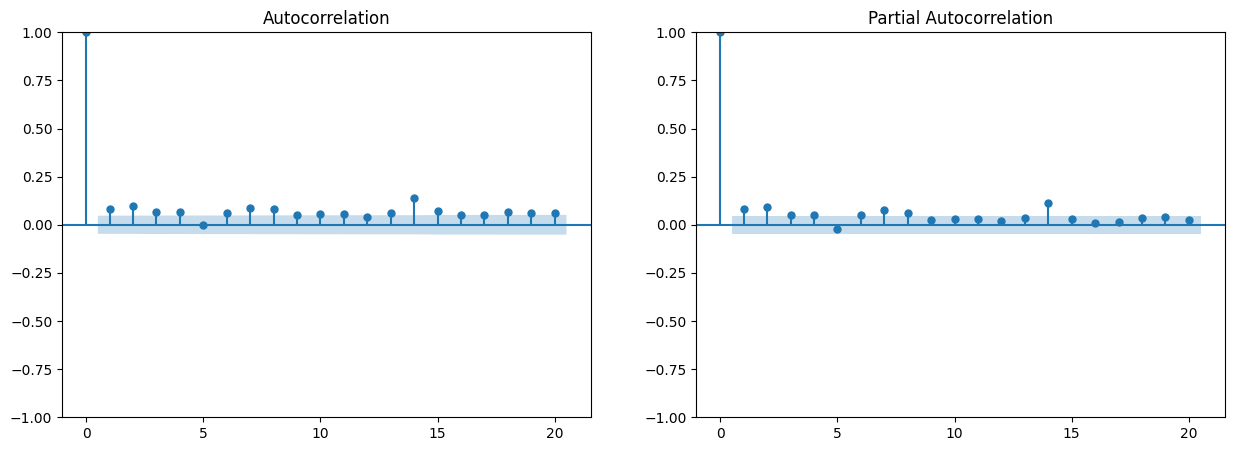

In [293]:
lags = 20

fig,ax = plt.subplots(1,2, figsize = (15,5))
plot_acf(train, lags = lags, ax = ax[0])
plot_pacf(train, lags = lags, ax = ax[1])
plt.show()

In [252]:
from itertools import product

p = [0,1,2,3,4]
q = [0,1,2,3,4]
d = [0,1]
iter = list(product(p,d,q))
iter

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [253]:
# 
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(30)
    mae.append( mean_absolute_error(val, pred))
    aic.append(model_fit.aic)
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 0, 4)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 1, 4)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)
(2, 0, 3)
(2, 0, 4)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 1, 4)
(3, 0, 0)
(3, 0, 1)
(3, 0, 2)
(3, 0, 3)
(3, 0, 4)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 1, 4)
(4, 0, 0)
(4, 0, 1)
(4, 0, 2)
(4, 0, 3)
(4, 0, 4)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)
(4, 1, 4)


In [254]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.09858,15674.745425


,"params(p,d,q)",mae,aic
48,"(4, 1, 3)",12.09858,15674.745425


In [255]:
#model2_1 = sm.tsa.SARIMAX(train, order=(2,0,3)).fit()
model2_2 = sm.tsa.SARIMAX(train, order=(4,1,3)).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


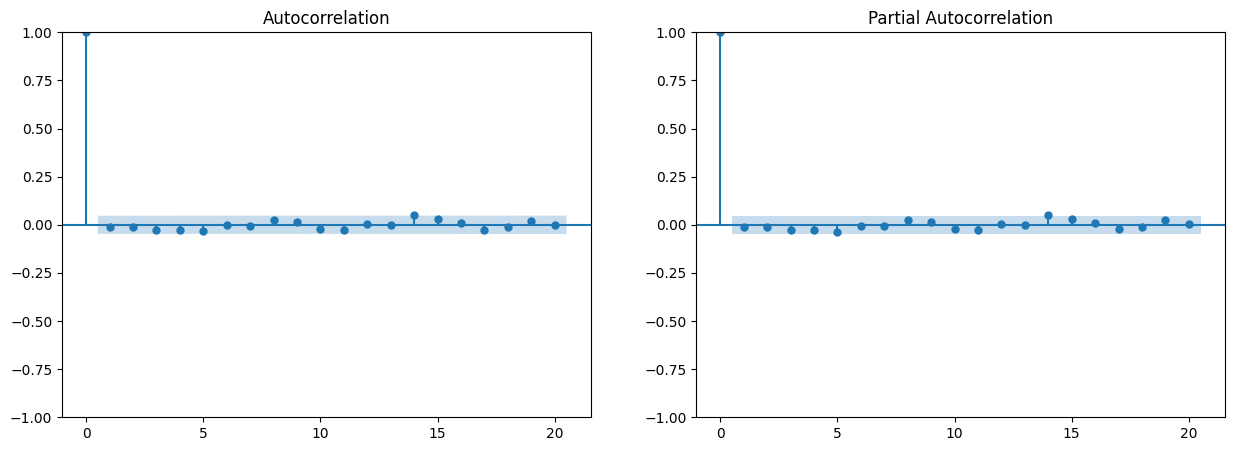

In [256]:
residuals = model2_2.resid
residual_diag(residuals)

In [257]:
pred2_2 = model2_2.forecast(30)
mean_absolute_percentage_error(val, pred)

0.04234983856844959

In [258]:
pred2_2.index = val.index

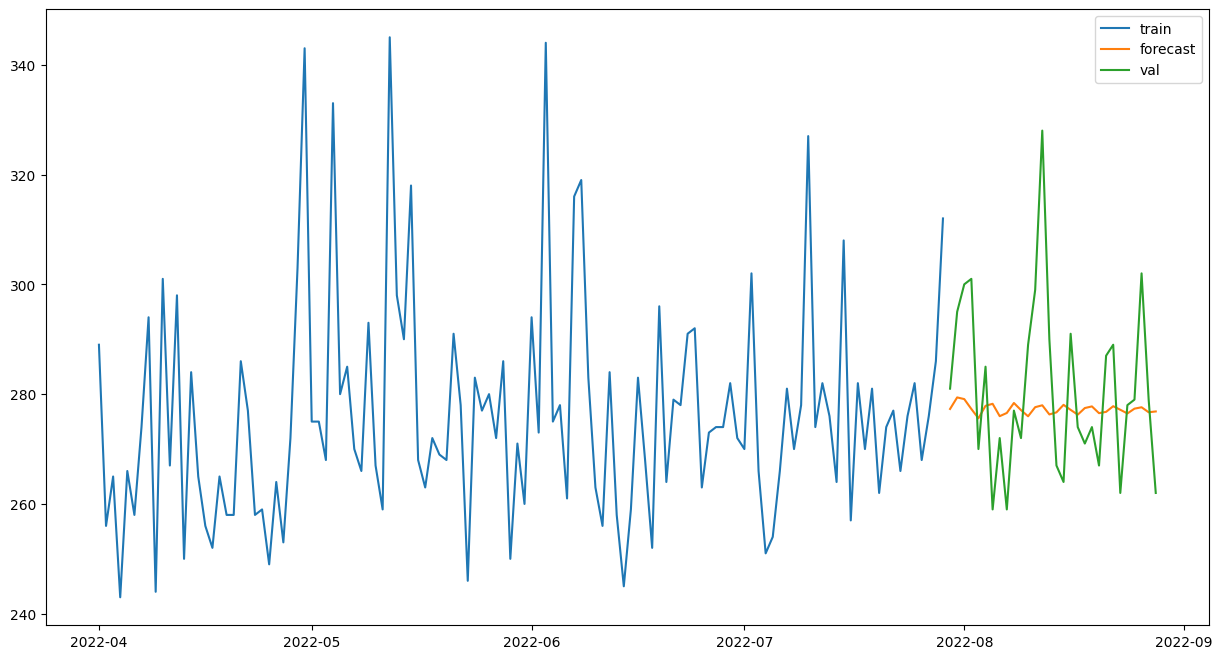

In [259]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred2_2, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend()
plt.show()

In [294]:
val_size = 30
x_train, y_train = x[:-val_size], y[:-val_size]
x_val, y_val = x[-val_size:], y[-val_size:]

In [261]:
model3_1 = sm.tsa.SARIMAX(y_train, order=(4,1,4), exog=x_train).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


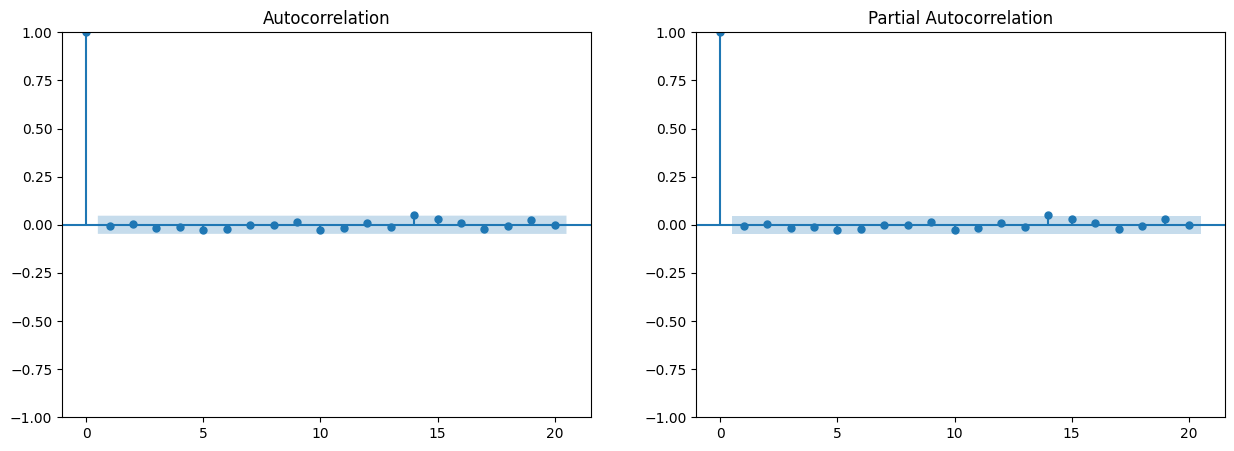

In [262]:
residuals = model3_1.resid
residual_diag(residuals)

In [272]:
pred3_1 = model3_1.forecast(30,  exog=x_val)
mean_absolute_percentage_error(y_val, pred3_1)

0.052583306663618504

In [264]:
pred3_1.index = y_val.index

In [265]:
y_val

DT
2022-07-30    281.0
2022-07-31    295.0
2022-08-01    300.0
2022-08-02    301.0
2022-08-03    270.0
2022-08-04    285.0
2022-08-05    259.0
2022-08-06    272.0
2022-08-07    259.0
2022-08-08    277.0
2022-08-09    272.0
2022-08-10    289.0
2022-08-11    299.0
2022-08-12    328.0
2022-08-13    290.0
2022-08-14    267.0
2022-08-15    264.0
2022-08-16    291.0
2022-08-17    274.0
2022-08-18    271.0
2022-08-19    274.0
2022-08-20    267.0
2022-08-21    287.0
2022-08-22    289.0
2022-08-23    262.0
2022-08-24    278.0
2022-08-25    279.0
2022-08-26    302.0
2022-08-27    279.0
2022-08-28    262.0
Name: y, dtype: float64

In [266]:
pred3_1

DT
2022-07-30    275.888321
2022-07-31    277.618775
2022-08-01    276.925552
2022-08-02    275.568225
2022-08-03    277.168215
2022-08-04    278.929508
2022-08-05    276.983590
2022-08-06    276.123832
2022-08-07    275.246407
2022-08-08    278.046613
2022-08-09    274.817185
2022-08-10    275.744523
2022-08-11    277.988346
2022-08-12    276.555774
2022-08-13    275.472771
2022-08-14    276.885408
2022-08-15    276.093483
2022-08-16    273.580387
2022-08-17    275.083555
2022-08-18    277.477189
2022-08-19    276.203611
2022-08-20    274.297712
2022-08-21    276.846166
2022-08-22    277.550417
2022-08-23    277.861984
2022-08-24    277.440714
2022-08-25    276.901915
2022-08-26    278.396380
2022-08-27    276.035712
2022-08-28    275.647918
Name: predicted_mean, dtype: float64

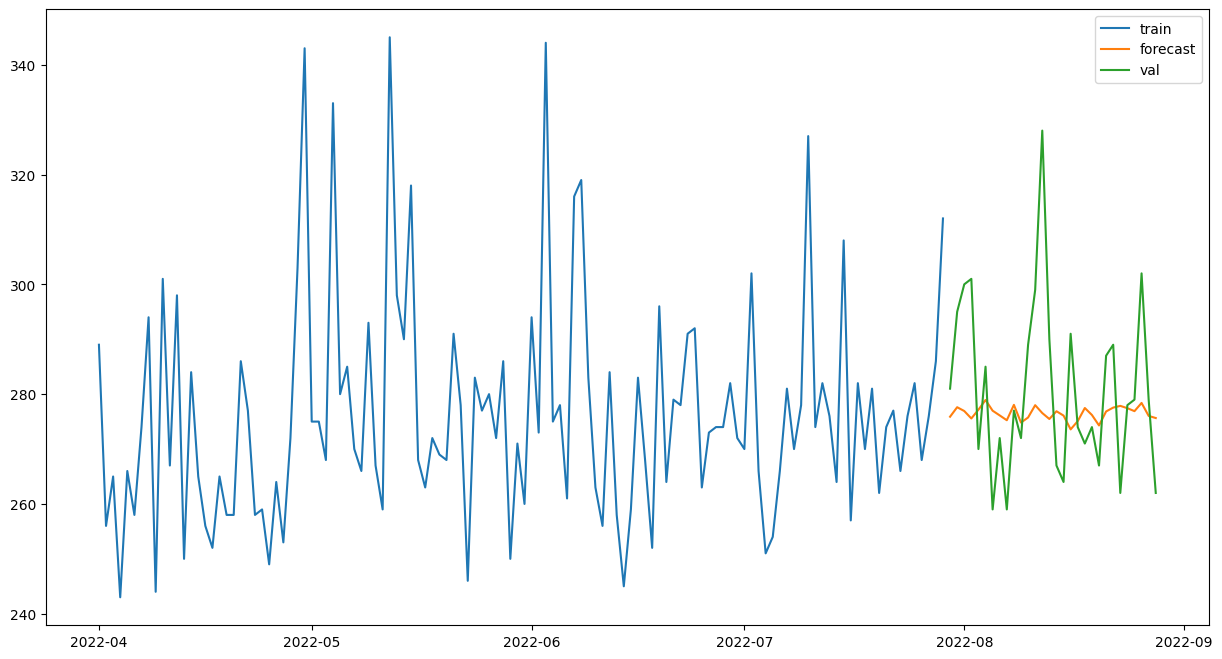

In [267]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_1, label = 'forecast')
plt.plot(val, label = 'val')
plt.legend() 
plt.show()

In [295]:
model3_2 = sm.tsa.SARIMAX(train, order=(4,1,4), seasonal_order=(4,1,4,7),exog=x_train).fit()


In [296]:
pred3_2 = model3_2.forecast(30,exog=x_val)
mean_absolute_percentage_error(y_val, pred3_2)

0.04296048557887112

In [297]:
pred3_2.index = y_val.index

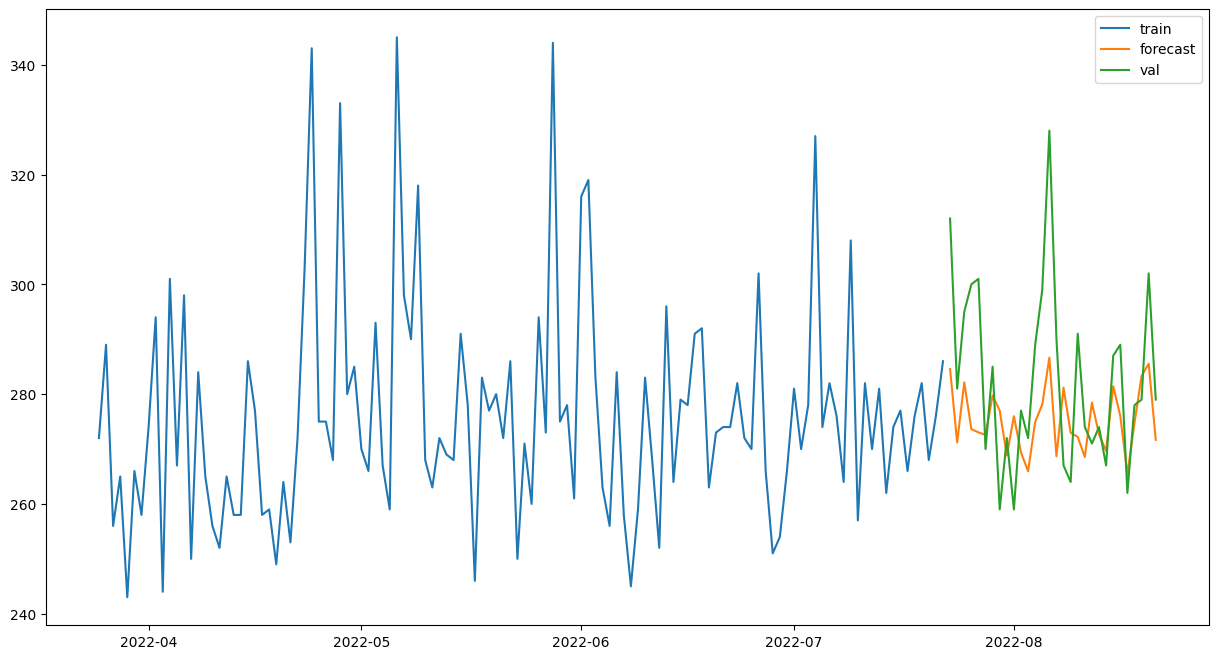

In [298]:
plt.figure(figsize=(15,8))
plt.plot(train[-120:], label='train')
plt.plot(pred3_2, label = 'forecast')
plt.plot(y_val, label = 'val')
plt.legend() 
plt.show()

In [303]:
import joblib



joblib.dump(model3_2, 'SARIMAX.joblib')


['SARIMAX.joblib']